# Código de corrección de cambio de fase
Este notebook contiene la implementación del código de corrección de un cambio de fase.

Como primer paso vamos a ver cómo afectaría un cambio de fase a un qubit.

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_distribution
import numpy as np

backend=Aer.get_backend('aer_simulator')



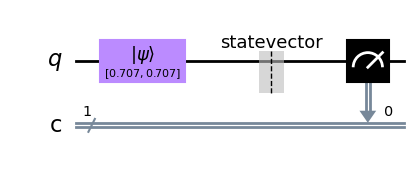

In [2]:
#Inicializo el qubit con el valor 1/sqrt(2)|0>+1/sqrt(2)|1>
qc=QuantumCircuit(1,1)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.save_statevector()
qc.measure(0,0)
qc.draw()

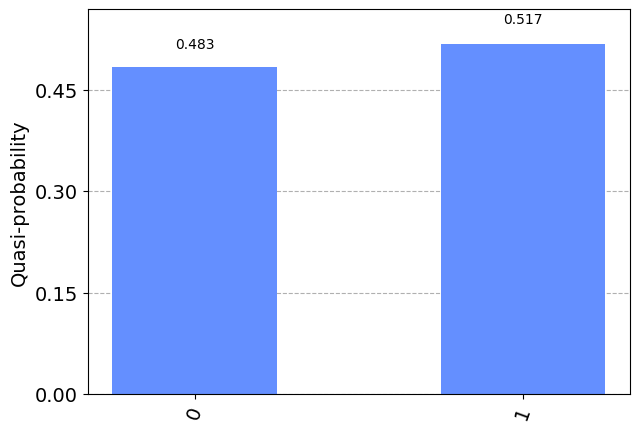

In [3]:
#Executo y obtengo los resultados con 1000 ejecuciones
job=execute(qc,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_distribution(counts)

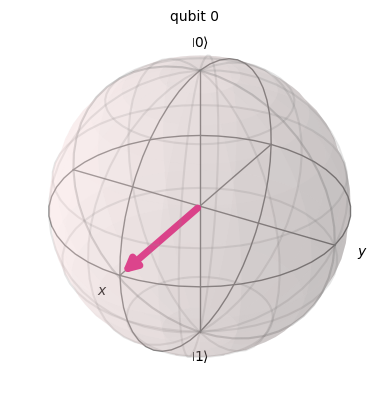

In [4]:
#Dibujo el qubit en la esfera de bloch
statevector=result.get_statevector(qc)
plot_bloch_multivector(statevector)

Ahora le aplico un cambio de fase. Vemos que el resultado de la medida es el mismo, pero el vector de estado es diferente. 

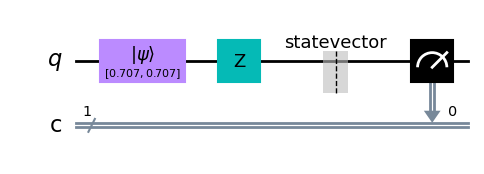

In [5]:
qc=QuantumCircuit(1,1)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.z(0)
qc.save_statevector()
qc.measure(0,0)
qc.draw()

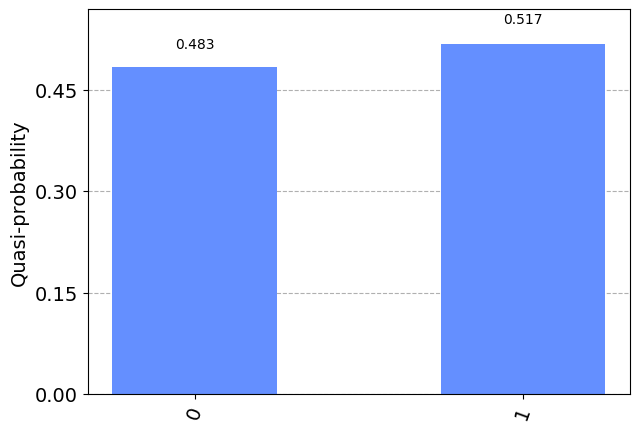

In [6]:
#Executo y obtengo los resultados con 1000 ejecuciones
job=execute(qc,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_distribution(counts)

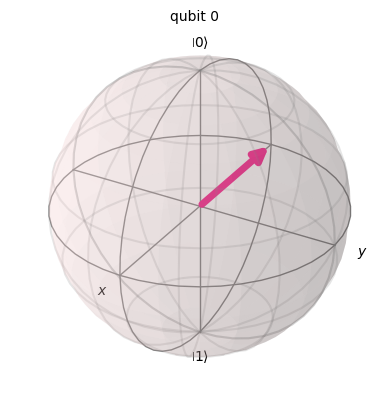

In [7]:
#Dibujo el qubit en la esfera de bloch
statevector=result.get_statevector(qc)
plot_bloch_multivector(statevector)

Vamos ahora a construir el código de corrección de un error tipo phase-flip.

Bit del flip (none para ninguno): 0


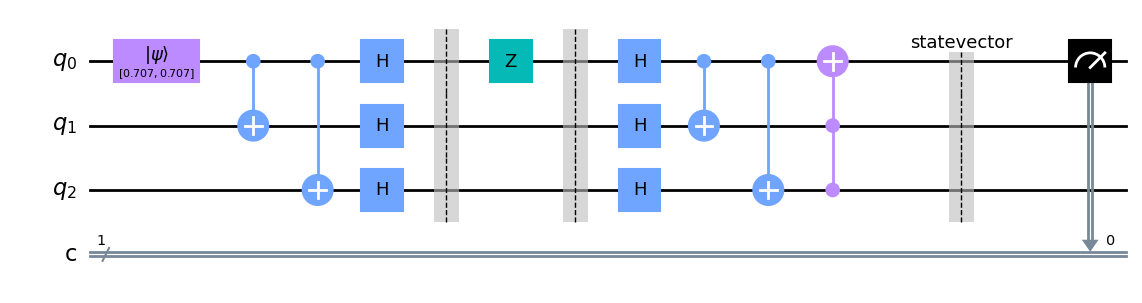

In [8]:
#Creo el circuito con el error simulado y la correccion de cambio de fase
qc=QuantumCircuit(3,1)

#Inicializo el qubit 0 con el valor 1/sqrt(2)|0>+1/sqrt(2)|1>
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)

#Codifico
qc.cx(0,1)
qc.cx(0,2)
qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

#Simulo un phase-flip dentro del circuito
while(True):
    bit=input("Bit del flip (none para ninguno):")
    if bit == 'none':
        break
    try:
        ibit=int(bit)
        if ibit > 2:
            print("Tiene que ser un número entre 0 y 2")
            continue
        qc.z(ibit)    
        break
    except:
        print("Tiene que ser un número entre 0 y 2 o none")

qc.barrier()

#Decodifico
qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(0,1)
qc.cx(0,2)

#Corrijo
qc.ccx(2,1,0)

qc.save_statevector()
qc.measure(0,0)
qc.draw()

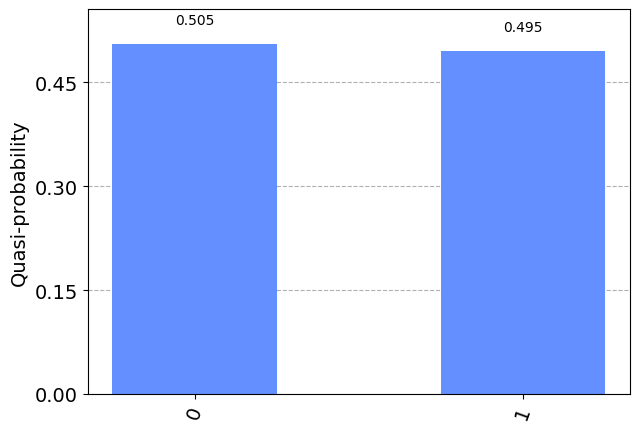

In [9]:
#Executo y obtengo los resultados con 1000 ejecuciones
job=execute(qc,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_distribution(counts)

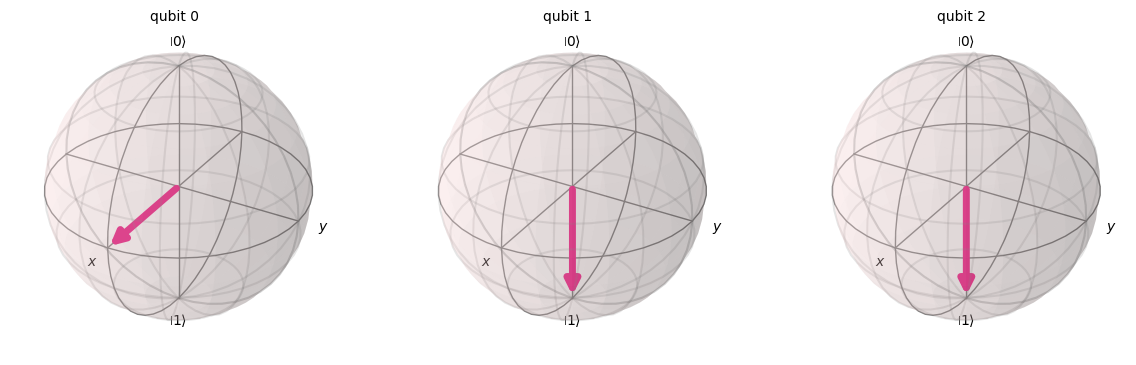

In [10]:
#Dibujo los qubits en la esfera de bloch
statevector=result.get_statevector(qc)
plot_bloch_multivector(statevector)

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table